## 改变一下R包的默认存储位置，方便调用

In [32]:
.libPaths()
.libPaths("C:/Users/Wei Li/Documents/R")
setwd("D:/data/datav")

[1] "C:/Users/Wei Li/Documents/R"        "C:/Program Files/R/R-3.3.3/library"

## 提前加载需要的R包

In [2]:
library (factoextra)


Loading required package: ggplot2
Welcome! Related Books: `Practical Guide To Cluster Analysis in R` at https://goo.gl/13EFCZ


In [3]:
#### Data manipulation ####
# load the data 文件存放在notebook平行的文件夹datav下
load("D:/data/datav/weather data for clustering.rda")
# 'ymdt' ---yearly average of 2015
# 'mmdt_st' ---monthly average of 2015 reshaped 
# 'allmdt' --- all year average of 2006-2015
# 'ym10dt_st' --- yearly average of 2006-2015 reshaped
ls()

[1] "allmdt"    "mmdt_st"   "ym10dt_st" "ymdt"

In [4]:
summary(ym10dt_st)

       V2       ymPRS_M_2006    ymPRS_M_2007    ymPRS_M_2008    ymPRS_M_2009  
 50136  :  1   Min.   : 5738   Min.   : 5729   Min.   : 5726   Min.   : 5729  
 50246  :  1   1st Qu.: 8830   1st Qu.: 8828   1st Qu.: 8828   1st Qu.: 8822  
 50247  :  1   Median : 9693   Median : 9693   Median : 9697   Median : 9688  
 50349  :  1   Mean   : 9242   Mean   : 9241   Mean   : 9243   Mean   : 9236  
 50353  :  1   3rd Qu.:10044   3rd Qu.:10042   3rd Qu.:10046   3rd Qu.:10038  
 50425  :  1   Max.   :10163   Max.   :10164   Max.   :10168   Max.   :10165  
 (Other):833                                                                  
  ymPRS_M_2010    ymPRS_M_2011    ymPRS_M_2012    ymPRS_M_2013  
 Min.   : 5733   Min.   : 5726   Min.   : 5716   Min.   : 5731  
 1st Qu.: 8826   1st Qu.: 8824   1st Qu.: 8817   1st Qu.: 8823  
 Median : 9693   Median : 9693   Median : 9683   Median : 9678  
 Mean   : 9239   Mean   : 9243   Mean   : 9232   Mean   : 9233  
 3rd Qu.:10040   3rd Qu.:10046   3rd Qu.:10

## 找出有缺失数据的行，获取其下标

In [5]:
dta <- ym10dt_st
list <- which(rowSums(is.na(dta))>0)
list

[1]  21  23  29  71  91  96 108 118 152 176 190 193 206 231 233 365 366 369 370
[20] 372 377 378 379 380 381 383 400 401 416 417 418 424 429 454 462 477 484 504
[39] 516 521 528 600 611 617 618 622 623 627 633 634 641 644 699 753 761 768

## 剔除缺失数据，然后对新数据进行标准化并计算欧式距离

In [6]:
dta2 <- dta[-list,]
head(dta2)

V2,ymPRS_M_2006,ymPRS_M_2007,ymPRS_M_2008,ymPRS_M_2009,ymPRS_M_2010,ymPRS_M_2011,ymPRS_M_2012,ymPRS_M_2013,ymPRS_M_2014,...,ymGST_C_2006,ymGST_C_2007,ymGST_C_2008,ymGST_C_2009,ymGST_C_2010,ymGST_C_2011,ymGST_C_2012,ymGST_C_2013,ymGST_C_2014,ymGST_C_2015
50136,9610,9615,9606,9607,9610,9619,9611,9603,9621,...,-45,-27,-25,-21,-16,-17,-33,-22,-22,-14
50246,9695,9697,9692,9693,9693,9698,9694,9684,9705,...,-38,-31,-36,-36,-14,-27,-45,-25,-31,-19
50247,9517,9521,9515,9514,9517,9525,9517,9507,9529,...,-49,-51,-39,-46,-34,-34,-49,-30,-37,-24
50349,9539,9542,9537,9534,9536,9533,9528,9518,9539,...,-45,-38,-31,-43,-38,-43,-38,-14,-27,-20
50353,9919,9916,9912,9914,9915,9919,9918,9905,9927,...,-35,-31,-47,-41,-33,-33,-46,-41,-40,-33
50425,9454,9459,9452,9451,9454,9467,9453,9447,9465,...,-87,-63,-41,-28,-30,-37,-44,-26,-27,-44


In [7]:
df.scaled <- scale(dta2[,-1]) # Data standardization
head(df.scaled)

ymPRS_M_2006,ymPRS_M_2007,ymPRS_M_2008,ymPRS_M_2009,ymPRS_M_2010,ymPRS_M_2011,ymPRS_M_2012,ymPRS_M_2013,ymPRS_M_2014,ymPRS_M_2015,...,ymGST_C_2006,ymGST_C_2007,ymGST_C_2008,ymGST_C_2009,ymGST_C_2010,ymGST_C_2011,ymGST_C_2012,ymGST_C_2013,ymGST_C_2014,ymGST_C_2015
0.2941233,0.2995567,0.2882208,0.2962872,0.2965069,0.2998571,0.3039857,0.2959905,0.3082402,0.3066431,...,-1.594920,-1.364631,-1.306748,-1.283324,-1.257069,-1.205241,-1.405314,-1.360384,-1.309500,-1.281933
0.3793440,0.3817579,0.3742860,0.3824725,0.3796978,0.3787835,0.3869964,0.3773427,0.3924020,0.3919959,...,-1.502228,-1.418146,-1.456803,-1.486577,-1.229261,-1.343946,-1.566970,-1.402111,-1.432526,-1.350439
0.2008817,0.2053262,0.1971519,0.2030868,0.2032929,0.2059446,0.2099735,0.1995730,0.2160629,0.2152654,...,-1.647888,-1.685717,-1.497728,-1.622079,-1.507342,-1.441039,-1.620855,-1.471655,-1.514543,-1.418944
0.2229389,0.2263777,0.2191685,0.2231299,0.2223366,0.2139372,0.2209749,0.2106208,0.2260822,0.2243027,...,-1.594920,-1.511796,-1.388597,-1.581428,-1.562959,-1.565873,-1.472671,-1.249114,-1.377848,-1.364140
0.6039257,0.6012951,0.5944528,0.6039488,0.6022086,0.5995776,0.6110254,0.5993038,0.6148296,0.6139133,...,-1.462502,-1.418146,-1.606858,-1.554328,-1.493438,-1.427168,-1.580441,-1.624652,-1.555552,-1.542254
0.1377181,0.1431741,0.1341041,0.1399510,0.1401480,0.1479987,0.1459652,0.1393120,0.1519396,0.1520038,...,-2.151077,-1.846260,-1.525010,-1.378175,-1.451726,-1.482650,-1.553498,-1.416020,-1.377848,-1.692965


In [8]:
dist.eucl <- dist(df.scaled, method = "euclidean" )

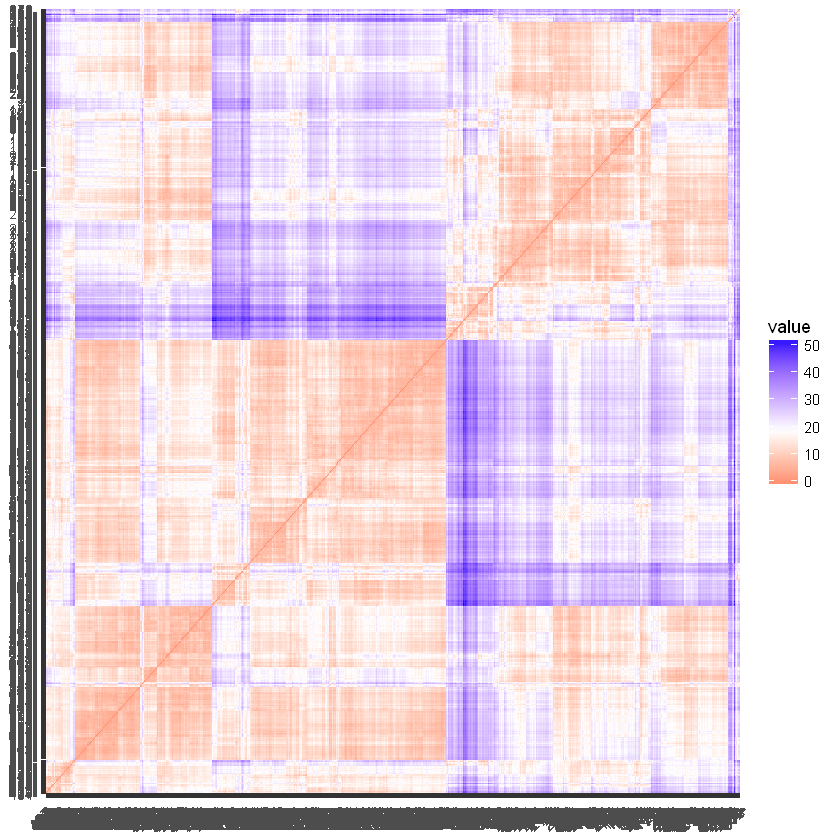

In [9]:
#Visualizing distance matrices ####
fviz_dist (dist.eucl)

## 使用K-means 算法进行聚类
- 首先根据碎石图选出合适的类别
- 然后利用所选类别进行聚类

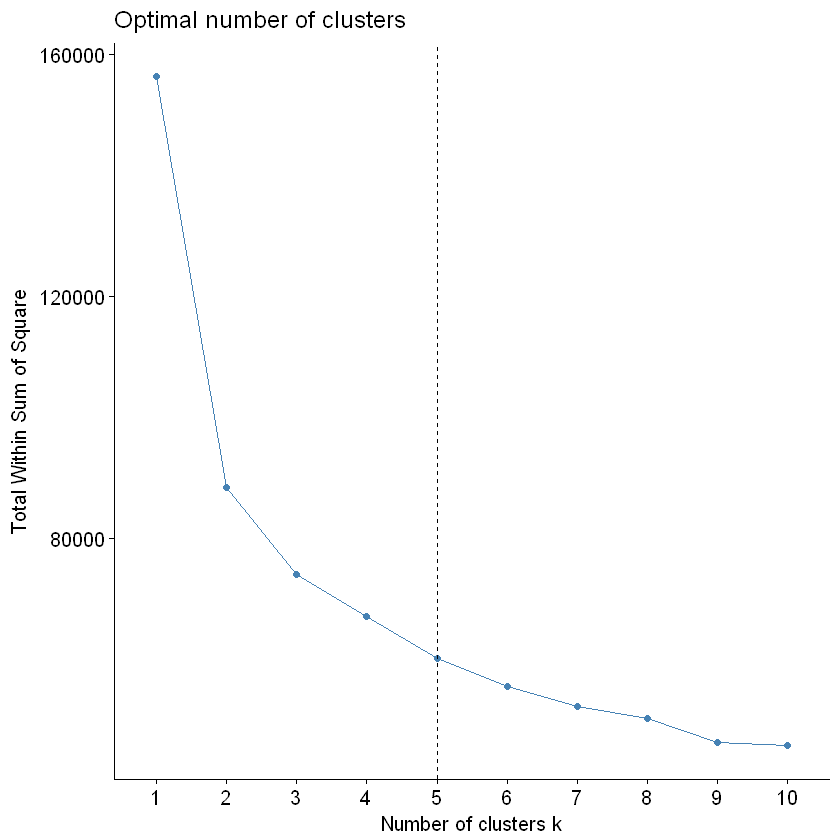

In [10]:
# K means cluster ####
# Estimating the optimal number of clusters ####
df <- df.scaled # scaled data for cluster
# no NAs allowed for kmeans cluster
fviz_nbclust(df, kmeans, method = "wss" )+
  geom_vline(xintercept = 5, linetype = 2)

In [11]:
# Compute k-means with k = 5 ####
set.seed(123)
km.res <- kmeans(df, 5, nstart = 50)

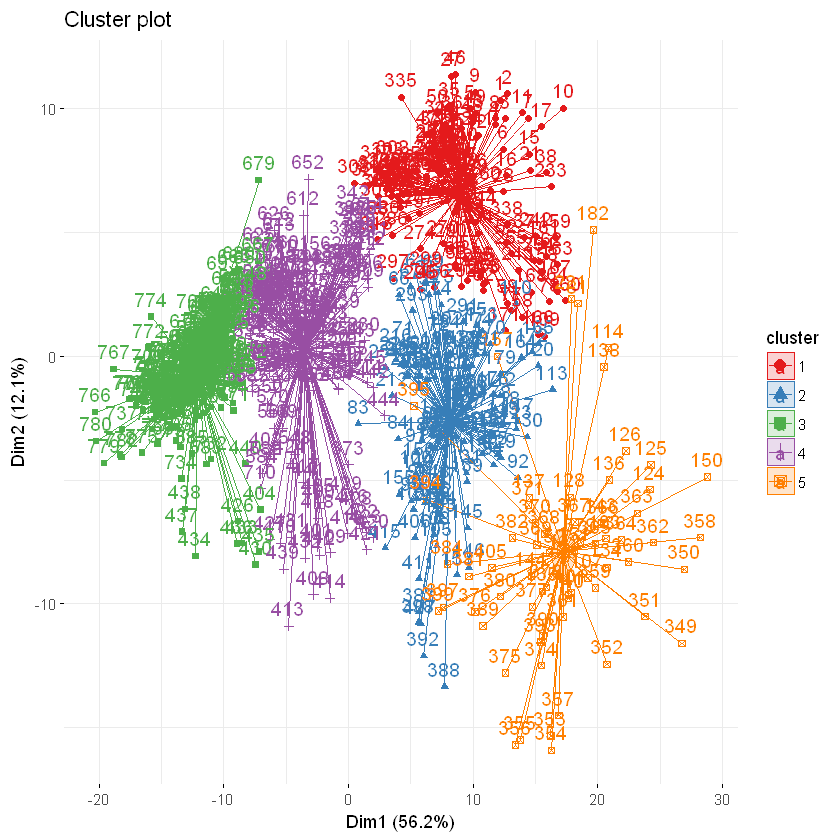

In [12]:
# plot the cluster resuts ####
fviz_cluster(km.res, data = df,
             palette = c("#E41A1C", "#377EB8", "#4DAF4A", "#984EA3", "#FF7F00"),
             ellipse.type = "euclid", # Concentration ellipse
             star.plot = TRUE, # Add segments from centroids to items
             repel = FALSE, # Avoid label overplotting (slow)
             ggtheme = theme_minimal ())

## 保存聚类的结果

In [13]:
# add the point classifications to the original data ####
dd <- cbind (dta2[1], cluster = km.res$cluster)
head(dd)
colnames(dd) <- c("stationID","cluster")
head(km.res$cluster, 100)
# save the cluster results ####
# write.csv(dd,"cluster with feature 10years yearly ave reshaped.csv")

V2,ymPRS_M_2006,ymPRS_M_2007,ymPRS_M_2008,ymPRS_M_2009,ymPRS_M_2010,ymPRS_M_2011,ymPRS_M_2012,ymPRS_M_2013,ymPRS_M_2014,...,ymGST_C_2007,ymGST_C_2008,ymGST_C_2009,ymGST_C_2010,ymGST_C_2011,ymGST_C_2012,ymGST_C_2013,ymGST_C_2014,ymGST_C_2015,cluster
50136,9610,9615,9606,9607,9610,9619,9611,9603,9621,...,-27,-25,-21,-16,-17,-33,-22,-22,-14,1
50136,9610,9615,9606,9607,9610,9619,9611,9603,9621,...,-27,-25,-21,-16,-17,-33,-22,-22,-14,1
50136,9610,9615,9606,9607,9610,9619,9611,9603,9621,...,-27,-25,-21,-16,-17,-33,-22,-22,-14,1
50136,9610,9615,9606,9607,9610,9619,9611,9603,9621,...,-27,-25,-21,-16,-17,-33,-22,-22,-14,1
50136,9610,9615,9606,9607,9610,9619,9611,9603,9621,...,-27,-25,-21,-16,-17,-33,-22,-22,-14,1
50136,9610,9615,9606,9607,9610,9619,9611,9603,9621,...,-27,-25,-21,-16,-17,-33,-22,-22,-14,1


ERROR: Error in setnames(x, value): Can't assign 2 names to a 202 column data.table


## 批量算聚类

In [24]:
# df with different clusters ####
cc = dta2[,1]
km = []
for (i in 2:9)
 {library(factoextra)
  set.seed(123)
  km.res <- kmeans(df, i, nstart = 50)
  cc <- cbind (cc, km.res$cluster)
  colnames(cc)[i] = paste("cluster",i,sep = "_")}

ERROR: Error in parse(text = x, srcfile = src): <text>:3:6: unexpected '['
2: cc = dta2[,1]
3: km = [
        ^


In [20]:
head(cc)

V2,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9
50136,1,3,1,1,1,4,6,6
50246,1,3,1,1,1,4,6,6
50247,1,3,1,1,1,4,6,6
50349,1,3,1,1,1,4,6,6
50353,1,3,1,1,1,4,6,6
50425,1,3,1,1,1,4,6,6


## 聚类结果的展示

In [26]:
# color choice ####
library(RColorBrewer)
colors <- brewer.pal(9,"Set1")

## 三个类别的

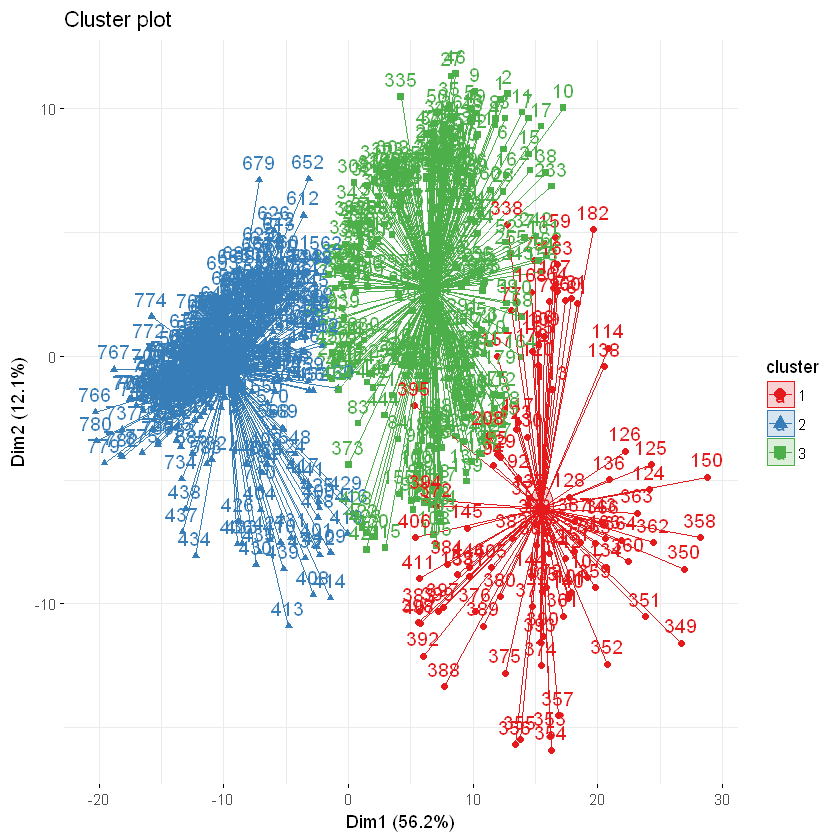

In [28]:
set.seed(123)
km.res <- kmeans(df, 3, nstart = 50)
fviz_cluster(km.res, data = df,
             palette = colors[1:3],
             ellipse.type = "euclid", # Concentration ellipse
             star.plot = TRUE, # Add segments from centroids to items
             repel = FALSE, # Avoid label overplotting (slow)
             ggtheme = theme_minimal ())

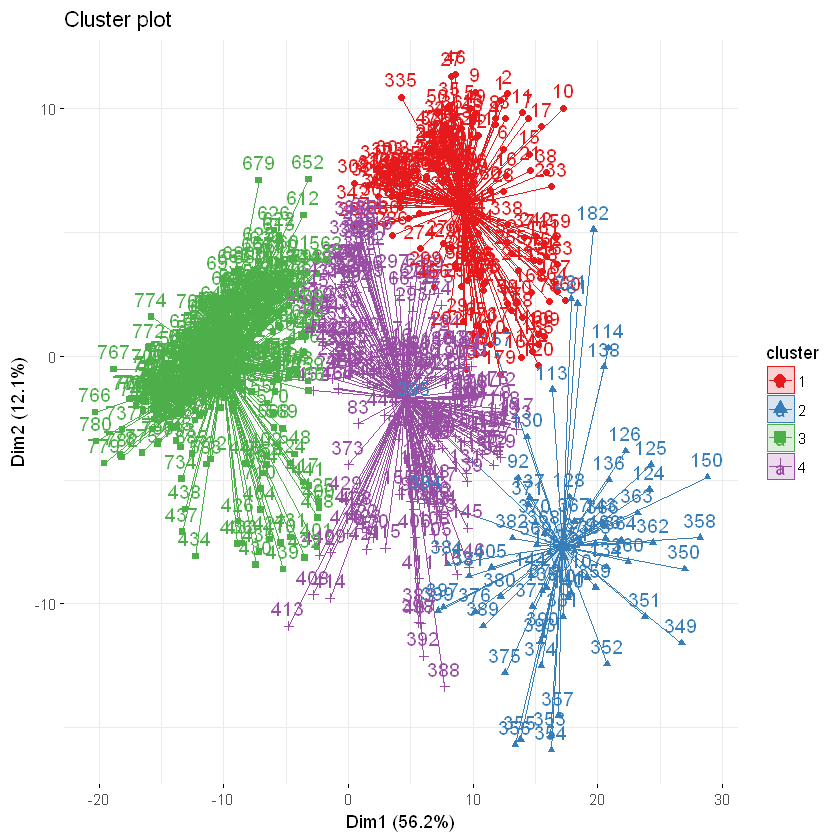

In [29]:
set.seed(123)
km.res <- kmeans(df, 4, nstart = 50)
fviz_cluster(km.res, data = df,
             palette = colors[1:4],
             ellipse.type = "euclid", # Concentration ellipse
             star.plot = TRUE, # Add segments from centroids to items
             repel = FALSE, # Avoid label overplotting (slow)
             ggtheme = theme_minimal ())

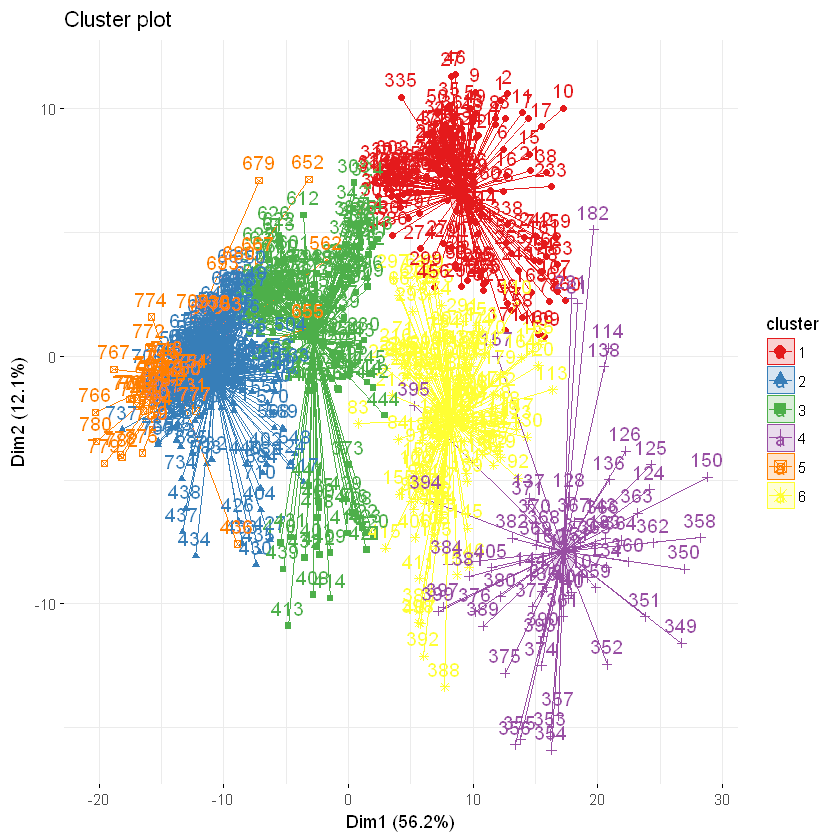

In [30]:
set.seed(123)
km.res <- kmeans(df, 6, nstart = 50)
fviz_cluster(km.res, data = df,
             palette = colors[1:6],
             ellipse.type = "euclid", # Concentration ellipse
             star.plot = TRUE, # Add segments from centroids to items
             repel = FALSE, # Avoid label overplotting (slow)
             ggtheme = theme_minimal ())

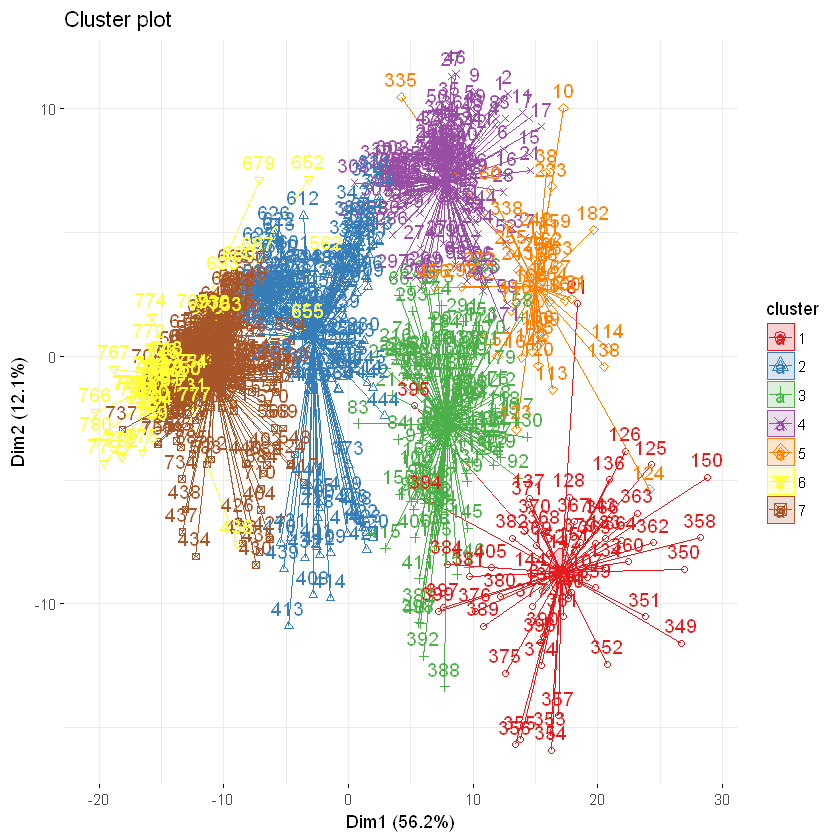

In [31]:
set.seed(123)
km.res <- kmeans(df, 7, nstart = 50)
fviz_cluster(km.res, data = df,
             palette = colors[1:7],
             ellipse.type = "euclid", # Concentration ellipse
             star.plot = TRUE, # Add segments from centroids to items
             repel = FALSE, # Avoid label overplotting (slow)
             ggtheme = theme_minimal ())

In [33]:
getwd()

[1] "D:/data/datav"

## 聚类结果在地图中的展示

In [34]:
#weather station data
load(file= "weather station.rda") # stmini
load(file= "station cluster.rda") # dd


In [52]:
# map of China ####
library("leafletCN")
library(leaflet)
m <- demomap("china")

In [53]:
embed_notebook(m)

ERROR: Error in eval(expr, envir, enclos): could not find function "embed_notebook"
